# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
data.keys()

Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype='object')

In [3]:
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [4]:
data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [5]:
# Note that by default, the standard deviatation function provided in pandas, normalizes the total deviation by N-1
# Whereas in numpy, the default standard deviation function normalizes the total deviation by N
# Here N denotes the total number of data points
print(
    " Standard deviation using defaults in pandas:{}\n Standard deviation using defaults in numpy:{}".
    format(prices.std(),np.std(np.array(prices))))

 Standard deviation using defaults in pandas:165340.27765266786
 Standard deviation using defaults in numpy:165171.13154429474


In [6]:
# The normalization to be used while calculating std, can be changed by passing the value of ddof 
# std is then calculated by normalizing the net deviation by N-ddof 
# ddof is 1 by default in pandas and ddof is 0 by default in numpy
print(
    " std with ddof={} in pandas:{}\n std using defaults in numpy: {}".format(0,prices.std(ddof=0),np.std(np.array(prices))))
print(" std with defaults in pandas: {}\n std using ddof={} in numpy: {}".format(prices.std(),1,np.std(np.array(prices),ddof=1)))    

 std with ddof=0 in pandas:165171.13154429477
 std using defaults in numpy: 165171.13154429474
 std with defaults in pandas: 165340.27765266786
 std using ddof=1 in numpy: 165340.27765266784


In [7]:
# storing prices as a numpy array
prc=np.array(prices)

# TODO: Minimum price of the data
# pandas implementation: minimum_price = prices.min()
minimum_price=prc.min()

# TODO: Maximum price of the data
# pandas implementation: maximum_price = prices.max()
maximum_price=prc.max()

# TODO: Mean price of the data
# pandas implementation: mean_price = prices.mean()
mean_price=prc.mean()

# TODO: Median price of the data
# pandas implementation: median_price = prices.median()
median_price=np.median(prc)

# TODO: Standard deviation of prices of the data
# pandas implementation: std_price = prices.std()
std_price=prc.std()

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429474


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Answer: **

1) Usually a house with more rooms is larger and hence has a higher price. This would therefore imply that a home with larger RM will be worth more. 

2) Since the purchasing power of the working poor will be low, it is therefore expected that they will predominantly reside in cheaper neighborhoods. Thus, the prices will be higher in a neighborhood with a lower LSTAT.

3) A higher "PTRATIO" indicates that the school has a relative shortage of teachers. On the other hand a neighborhood with low "PTRATIO" implies that the school in that neighborhood can afford to hire a larger number of teachers. This is perhaps because the school charges a higher fee. It therefore follows that such neighborhoods are relatively affluent and hence the families in these neighborhoods most possibly live in more expensive houses. Thus, neighborhoods with lower "PTRATIO" will tend to have a higher home prices.  

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [8]:
# TODO: Import 'r2_score'

from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [9]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:**

1) Yes, I think that the model has successfully captured the variation of the target variable in the given example. 

2) This is because, in the present case, the R2 score is 0.923 which is quite close to being 1. This can be interpreted as the model being able to explain $92.3\%$ of the target values. Hence the model seems to be quite good. However, since it is not exactly 1, it might be that there is still some room to improve the model, perhaps by increasing the model complexity.  


### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.model_selection` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [10]:
# TODO: Import 'train_test_split'

from sklearn.model_selection import train_test_split

test_size = 0.2
seed=42

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=test_size, random_state=seed)

# Success
print("Training and testing split was successful.")
print("Shape of the training set is:{}\nShape of the test set:{}".format(X_train.shape,X_test.shape))

Training and testing split was successful.
Shape of the training set is:(391, 3)
Shape of the test set:(98, 3)


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer: **

To begin with splitting the data into a training set and a test set makes it possible for us to evaluate how our model will perform on unseen data. This is extremely important because given some data, we can always fine tune our model such that our predictions match the actual values of the target variable as closely as possible with minimum error. However, this low error on the training data can be a result of overfitting. We therefore need to also check how the model performs on new, unseen data. It therefore helps us understand the generalizabity of our model. 

On top of it, by splitting the data into various proportions of training, validation and test set, and using these to plot the learning and complexity curves, we can obtain valuable information in terms of what we need to do to make a better hypothesis i.e. if it is the lack of sufficient data that is limiting the performance of our model or if the lower performance stems from underfitting in which case our model is just not complex enough. If the model is not complex enough, it will be futile to collect more data without increasing the model complexity. 

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

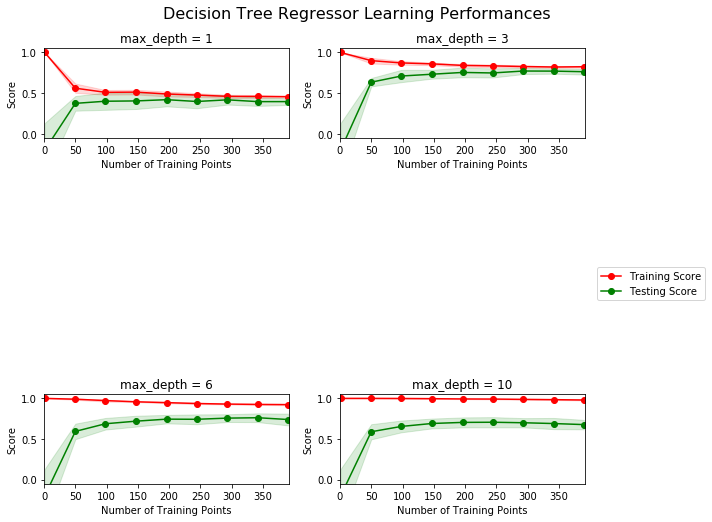

In [11]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer: **

1) I will answer the questions by referring to the graph corresponding to the model with maximum depth 1

2) In this model, the training score initially decreases but then level off and stays roughly constant as the number of training points are increased. Similarly, on the test data, the score initially seems to improve slightly and then becomes almost constant as one adds more and more data. Both training score and test score seem to converge to a score of about 0.5. This indicates that only $50\%$ of the atual housing prices can be captured by the model. This is quite a low score. 

3) Both the training and the test scores seem to have leveled off after about 300 training points in the chosen model. Not only this, they seem to have converged to the a score of 0.5. This convergence to a low score of the learning training/test curves suggests that the model underfits the data. Therefore merely increasing the number of training points will not make any significant difference to the model. The model suffers from high bias and therefore we need to look for more complex models before trying to use a larger set of data points to obtain a better performance. In contrast to this, we can also look at the graphs in the model with maximum depth 6. In this case the training scores seems to be continuously dropping while the test score seems to be rising as the number of data points are increased. There is also a significant gap between the training and test scores. This suggests that the model suffers from high variance. Getting more data in this case will certainly help fix this. Amongst all the graphs that have been displayed above, the model with maximum depth 3 seems to perform the best with the training and test curves converging to a score of about 0.75. In a scenario where this might be an acceptable performance, adding more training data will make the computer comsume more computational resources without adding more value to our hypothesis. 




### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

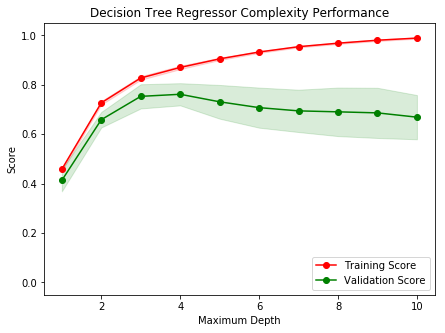

In [12]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer: **

1) When the maximum depth is 1, the training and validation scores are close to each other, but both are quite low. At the same time both the scores improve as the model complexity is increased. This implies that this model suffers from high bias. 

2) When the maximum depth of the model is 10, the training score seems to be significantly higher that validation score. At the same time, this value of maximum depth seems be in the region of the complexity curves where the validation score drops as the maximum depth is increased. It therefore follows that this model suffers from high variance. 

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer: **

1) It seems like the most optimal value for maximum depth is 4

2) This is because, below a maximum depth of 4, both the training and validation scores increase thereby indicating that the maximum depth can be safely increased to achieve a better performance. However, after the maximum depth of 4, the validation scores seem to start dropping. This implies that upon increasing the maximum depth beyond 4, while we might be able to obtain a better fit to the training data but the model does not fit equally well on unseen data, thereby indicating overfitting on training data in this region. This seems to suggest that a maximum depth of 4, at which the validation scores are the highest, is the most optimal model to fit the given data. 


-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer: **

1) In any given model there are a number of tunable parameters (called hyperparameters) which help us control the complexity of the model. These hyperparameters are part of the data that a machine learning specialist has to provide as an input when training his machine to learn a particular task. For e.g. in tasks that involve regression, the degree of polynomial used to fit the data is one such hyperparameter. Another hyperparamater is the regulization parameter. Grid search is technique to scan over a grid of possible values for these hyperparameters and find the most optimal values to be used to build a model. 

2) More specifically, grid search involves dividing the data into 3 parts - the training set, the validation set and the test set. For any chosen tuple of hyperpararmeter values, we first fit the model on the training set and then evaluate its ability to generalize to new unseen data by considering its performance on the validation set. This gives us a validation score for that tuple of hyperparameter values. Given a grid of hyperparameter values, we record and prepare a table of validation set scores for each tuple of hyperparameter values in the grid. The set of hyperparameter values for which the model has the best validation score is then chosen as the most optimal model. However, since we used the validation set to fix the hyperparameters, we can not expect the validation set accuracy to carry over to new data, this way of choosing the hyperparameters will leak the information about the validation set to the model. Thus, the validation score is not a true indicator of the generalizability of the model to unseen data. Once an optimal value of the hyperparameters has been found, the computer is retrained, this time using both the training and the validation set. A measure of the model's generalizability to unseen data is then obtained by evaluating the model's performance on a seperate test set.    

As an explicit example, during a regression task, we can try building models based on polynomials of increasing degree, along with using different possible values for the regularization parameter. We can then choose the optimal degree and the optimal value for the regularization parameter by finding the model with the highest validation score. Once this is done, we can obtain a measure of expected performance of the model on unseen data, by evaluating it on the test set. 


### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer: **

 A simple minded grid search that involves a fixed training and validation set, still has the potential to overfit. Thus it is highly possible that the model performs quite well on the training and the validation set but has a relatively poor performance on new unseen data. This stems from the model learning some very specific but non-general trends in the feature values of training and the validation set. The k-fold cross validation technique is designed to overcome this issue to some extent. In k-fold cross validation, after setting aside a test set, the remaining data is divided into k batches called "folds". Evaluating the model corresponding to a given tuple of hyperparameter values then involves the following steps:
 
 a) Each fold is used once as a validation set with the remaining k-1 folds being used to train the model. Thus corresponding    to each fold, our model gets assigned a validation score. 
 
 b) The average of these validation scores is then used to assign a performance measure to the model. We call this the cross-validation score.

We thus see that in k-fold cross validation, the model corresponding to a given set of hyperparameter values is trained and validated k times, with the training and validation sets being different during each iteration. Thus, the final cross-validation score of the model will reflect its ability to catch only those trends in the feature values that are generalizable.

We then choose that set of hyperparamter values for which the model has the highest cross-validation score. The model is now trained once again on the full training set and its expected performance on unseen data can gauged by evaluating it on the test set that we had originally set aside.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.20/modules/generated/sklearn.model_selection.GridSearchCV.html) from `sklearn.model_selection` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [13]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV


def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator=regressor,param_grid=params,scoring=scoring_fnc,cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [14]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**Answer: **

The optimal model has a maximum depth of 4. This is exactly what we had obtained in Question 6. 

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [15]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


**Answer: **

Client 1 has house which does not appear to be small but it isn't large either. Also, it is in a neighborhood with decent but not too high poverty level and the public school seems to have just little less than average student-to-teacher ratio. All this seems to suggest that the price for client 1 will be somewhere within 1 standard deviation of the average price. Thus, we expect him to sell for a price between $\$371000$ and $\$537000$.  

On the otherhand, client 2 has a small house, in a neighborhood with not so good public school and relatively high poverty level, we expect client 2 to sell at a price somewhere within 1 standard deviation of the minimum price. Thus the expected selling price for client 2 will be between $\$105000$ and $\$270000$.

Since client 3 has the biggest house, in the best public school neighborhood and with a very low poverty level, we therefore expect that the price for client 1's house will be close to the maximum selling price in our data. Assuming that the prices in a given neighborhood always lie within 1 standard deviation of each other, we therefore expect that the selling price for client 3 will be somewhere between $\$860000$ and $\$1024800$.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [16]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer: **

The model constructed above is based on data collected in 1978. Even if we take inflation into account to predict the housing prices for the present times, it will still not be correct to blindly trust such predictions. This is because the data as presented here fails to take into account how the various neighborhoods have transformed over the past 40 years. For example, it is entirely possible that many neighborhoods that were relatively poor in the late 1970's have become much better by now. Thus one also has to see how the other parameters in the data have changed by now. 

Similarly, the features used to obtain the predictions seem to be only a subset of those that affect home-prices. for e.g. area of the plot, or factors such as distance to the nearest gym/pool have not been accounted for. Similarly, distance of the neighborhood from downtown is a factor that affects housing prices quite a bit. This has not been taken into account either.  

The model also does not appear to be very robust. The prices seem to fluctuate by about ~ $\$70000$ when choosing the training data slightly differently. This is represents a fluctuation of about $20\%$ relative to the minimum value of the predicted price. Anything more than a few percent of variation in a prediction would render it almost unusable, thus a $20\%$ variation as seen here, raises a lot of doubts about the usability of the model constructed here.  

Also, before applying the data collected in Boston to predict the housing prices in other cities, one will need to carefully consider if Boston is indeed comprarable to their target city. Clearly, a rural city will have much lower prices for the same kind of houses and thus using the data from Boston will give us a very unrealistic prediction for such cities. Also, there are certain local properties of any city that can affect the housing prices there, for e.g. distance from some local attraction. Such features will vary from city to city and it will not be quite right to apply a model based on data from one city to another city.

However, it is not entirely unfair to judge the price of an individual home from the characteristics of the entire neighborhood. To the very least, the average housing price in a neighborhood will give us a fair idea of the base price which can then be adjusted to take into account he individual features of the house itself that distinguishes it from the other houses in that neighborhood. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.